In [14]:
import pandas as pd

data = pd.read_excel('datos proteinas biblio - train.xlsx')

columnas = list(data.columns)
data2 = data.drop(columns=['Proteina'])
data2.head()

data_test = pd.read_excel('datos proteinas 2.xlsx')
data_test2 = data_test.drop(columns=['Proteina'])

In [5]:
correlation=data2.corr()
correlation

,MM,pI,gravy_index,instability_index,surface_entropy,surphase_hydrophobicity,surface_rugeness,coil,alfa,beta,%alif,%cys,%arom,%prol,Solubilidad_pH=8(0/1)
MM,1.000000,-0.185714,-0.106506,0.263343,0.150414,-0.024072,0.459976,0.404165,-0.155361,-0.285764,-0.191751,0.050620,-0.000204,0.050620,-0.470087
pI,-0.185714,1.000000,0.103407,-0.108982,0.069032,0.114666,0.068076,-0.013010,-0.059952,0.161254,0.002258,0.139650,-0.171268,0.139650,0.078337
gravy_index,-0.106506,0.103407,1.000000,-0.438666,0.679571,0.886383,0.339200,-0.152595,-0.207676,0.437756,0.703738,0.355226,-0.602003,0.355226,0.367086
instability_index,0.263343,-0.108982,-0.438666,1.000000,-0.305973,-0.339699,-0.092480,0.361414,0.001586,-0.391902,-0.487235,-0.026255,0.141694,-0.026255,-0.510453
surface_entropy,0.150414,0.069032,0.679571,-0.305973,1.000000,0.819685,0.042216,0.216860,-0.320676,0.239449,0.242786,0.356147,-0.428619,0.356147,0.051348
surphase_hydrophobicity,-0.024072,0.114666,0.886383,-0.339699,0.819685,1.000000,0.195748,-0.034951,-0.225581,0.353999,0.519252,0.419284,-0.470269,0.419284,0.187267
surface_rugeness,0.459976,0.068076,0.339200,-0.092480,0.042216,0.195748,1.000000,-0.056378,0.013456,-0.021628,0.350962,0.318358,-0.245012,0.318358,-0.181689
coil,0.404165,-0.013010,-0.152595,0.361414,0.216860,-0.034951,-0.056378,1.000000,-0.708463,-0.049118,-0.457279,-0.048705,-0.269837,-0.048705,-0.255007
alfa,-0.155361,-0.059952,-0.207676,0.001586,-0.320676,-0.225581,0.013456,-0.708463,1.000000,-0.626434,0.155793,-0.034247,0.445701,-0.034247,-0.045393
beta,-0.285764,0.161254,0.437756,-0.391902,0.239449,0.353999,-0.021628,-0.049118,-0.626434,1.000000,0.249558,0.097153,-0.322183,0.097153,0.355598


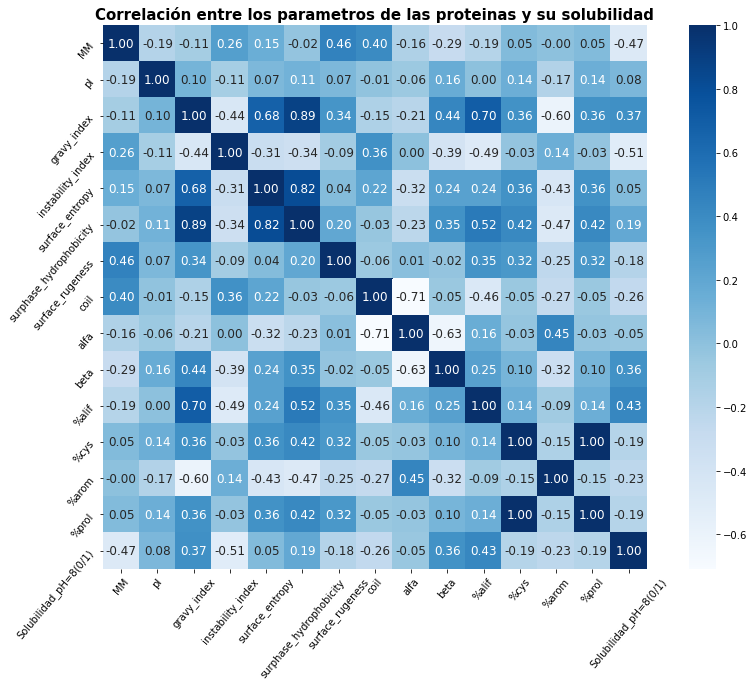

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            xticklabels= correlation.columns, yticklabels= correlation.columns,cmap= 'Blues')
plt.title('Correlación entre los parametros de las proteinas y su solubilidad',fontweight = 'black', fontsize = 15)
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

In [56]:
#data cleaning
x_train= data2.drop (columns= ['Solubilidad_pH=8(0/1)'])
y_train= data2['Solubilidad_pH=8(0/1)']

x_test= data_test2.drop (columns= ['Solubilidad_pH=8(0/1)'])
y_test= data_test2['Solubilidad_pH=8(0/1)']


In [64]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

modelo = DecisionTreeClassifier()
modelo.fit(x_train, y_train)
predictions = modelo.predict(x_test)

score= accuracy_score(y_test, predictions)
score

0.5813953488372093

In [65]:
#KNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [84]:
n_neighbors = 3
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.44


In [85]:
pred = knn.predict(x_test_scaled)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 7 10]
 [14 12]]
              precision    recall  f1-score   support

           0       0.33      0.41      0.37        17
           1       0.55      0.46      0.50        26

    accuracy                           0.44        43
   macro avg       0.44      0.44      0.43        43
weighted avg       0.46      0.44      0.45        43



In [105]:
#x_train y x_ test scalado de ndarray a dataframe
x_train2= pd.DataFrame(x_train_scaled, columns = x_train.keys())
x_test2= pd.DataFrame(x_test_scaled, columns = x_test.keys())

In [107]:
#linear regression con tensor flow
import tensorflow as tf
import numpy as np

def input_fn(feature, labels, training=True, num_epochs=10, batch_size=25):
    dataset= tf.data.Dataset.from_tensor_slices((dict(feature), labels))
    
    if training:
        dataset=dataset.shuffle(500).repeat(num_epochs)
        
    return dataset.batch(batch_size)


my_feature_columns = []

for key in x_train2.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

In [108]:
linear_est = tf.estimator.LinearClassifier(feature_columns=my_feature_columns)
linear_est.train(lambda:input_fn(x_train2, y_train, training=True))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Usuario1\\AppData\\Local\\Temp\\tmpb5601bia', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32

In [109]:
evaluacion= linear_est.evaluate(lambda:input_fn(x_test, y_test, training=False))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-22T10:01:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Usuario1\AppData\Local\Temp\tmpb5601bia\model.ckpt-40
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.75961s
INFO:tensorflow:Finished evaluation at 2021-12-22-10:01:38
INFO:tensorflow:Saving dict for global step 40: a

In [111]:
print('accuracy of model= {:.2f}'.format(evaluacion['accuracy']))

predicciones = list(linear_est.predict(lambda:input_fn(x_test2, y_test, training=False)))

accuracy of model= 0.37
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Usuario1\AppData\Local\Temp\tmpb5601bia\model.ckpt-40
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [278]:
#support vector machine

from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC

model = svm.SVC(kernel='sigmoid', gamma= 1, C= 40)
model.fit(x_train2, y_train)

y_pred = model.predict(x_test2)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6744186046511628


In [229]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5581395348837209


In [263]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [266]:
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(x_train2, y_train)# Make prediction
    y_pred = svclassifier.predict(x_test2)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))
    
# Accuracy obtenidos:
# polynomial= 0.42
# rbf= 0.44
# sigmoid= 0.51
# lineatr= 0.44

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.40      1.00      0.58        17
           1       1.00      0.04      0.07        26

    accuracy                           0.42        43
   macro avg       0.70      0.52      0.33        43
weighted avg       0.76      0.42      0.27        43

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.36      0.53      0.43        17
           1       0.56      0.38      0.45        26

    accuracy                           0.44        43
   macro avg       0.46      0.46      0.44        43
weighted avg       0.48      0.44      0.44        43

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.41      0.53      0.46        17
           1       0.62      0.50      0.55        26

    accuracy                           0.51        43
   macro avg       0.51      0.51      0.51     

In [274]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 50, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train2,y_train)

print(grid.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .........................C=50, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=50, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=50, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=50, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=50, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=50, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=50, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=50, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=50, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=50, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=50, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=50, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

In [281]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 0 17]
 [ 0 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.60      1.00      0.75        26

    accuracy                           0.60        43
   macro avg       0.30      0.50      0.38        43
weighted avg       0.37      0.60      0.46        43



C:\Users\Usuario1\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario1\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuario1\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)